# Iris Classification

In [30]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
!pip install scikit-learn==1.3.0

In [32]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df['species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [35]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

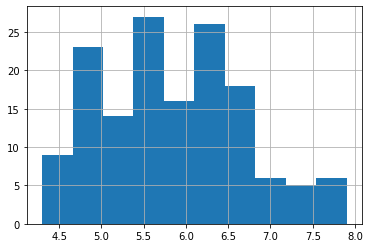

In [36]:
df['sepal_length'].hist()

<AxesSubplot:>

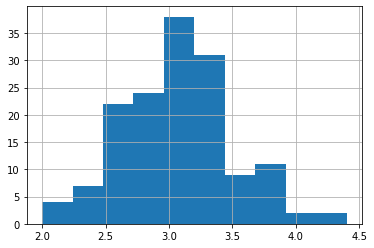

In [37]:
df['sepal_width'].hist()

<AxesSubplot:>

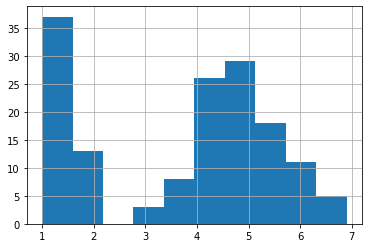

In [38]:
df['petal_length'].hist()

<AxesSubplot:>

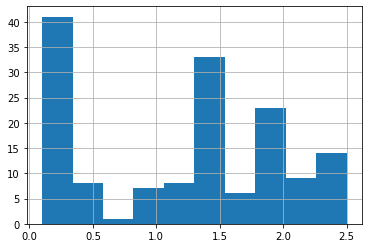

In [39]:
df['petal_width'].hist()

In [40]:
colors = ['red', 'orange', 'blue']
species =['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

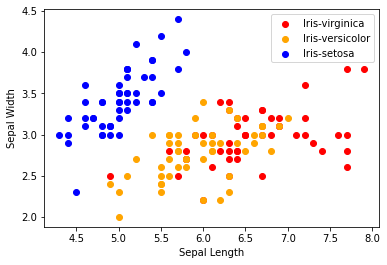

In [41]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

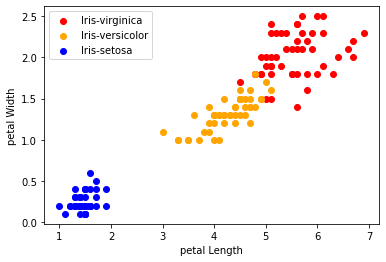

In [42]:
 for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

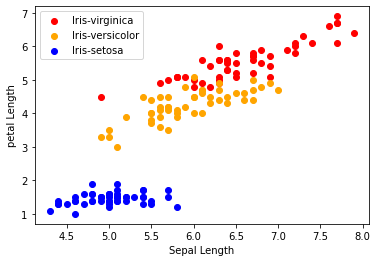

In [43]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("petal Length")
plt.legend()

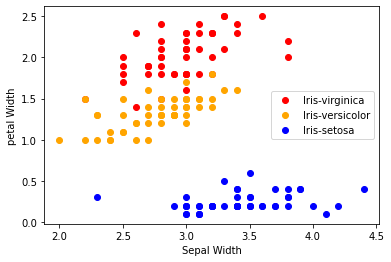

In [44]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("petal Width")
plt.legend()

In [45]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

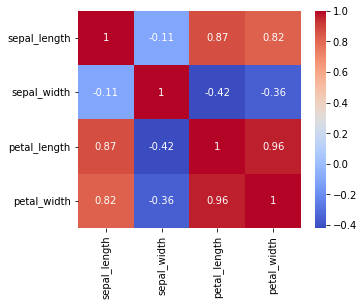

In [46]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X = df.drop(columns =['species'])
Y = df['species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [48]:
# Logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ",model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  95.55555555555556


In [49]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [50]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [51]:
# save the model
import pickle 
filename = 'saved_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [52]:
filename = 'saved_model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


In [53]:
load_model = pickle.load(open(filename, 'rb'))

In [54]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

In [55]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
108,6.7,2.5,5.8,1.8
113,5.7,2.5,5.0,2.0
92,5.8,2.6,4.0,1.2
29,4.7,3.2,1.6,0.2
73,6.1,2.8,4.7,1.2


In [56]:
load_model.predict([[4.0, 3.0, 1.0, 5.0]])

array(['Iris-setosa'], dtype=object)